# **Predicting Airline Fares using various ML models**

### Importing Libraries and basic exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Flight Analysis/Data_Train.xlsx')

In [4]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Dropping missing values

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### converting data type of column from object to date, departure time and arrival time

In [10]:
def change_into_datetime(col):
  train_data[col] = pd.to_datetime(train_data[col])

In [11]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_into_datetime(i)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### extracting info from doj

In [13]:
train_data['journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month
train_data['journey_year'] = train_data['Date_of_Journey'].dt.year

In [14]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-22 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-22 05:50:00,2021-08-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


 ### dropping doj as extracted everything from it

In [15]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

### extracting departure and arrival time only


In [16]:
def extract_hour(df,col):
  df[col + '_hour'] = df[col].dt.hour

def extract_min(df,col):
  df[col + '_minute'] = df[col].dt.minute

### dropping departure and arrival column

In [17]:
def drop_column(df,col):
  df.drop(col,axis=1,inplace=True)

In [18]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [19]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [20]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


### converting duration to list to train ML model and dropping duration column

In [21]:
duration = list(train_data['Duration'])

In [22]:
for i in range(len(duration)):
  if len(duration[i].split(' '))==2:                         #when 2 items already present in list
    pass
  else:
    if 'h' in duration[i]:                                   #when only hour present
      duration[i] = duration[i] + ' ' + '0m'
    else:                                                     #when only minute present
      duration[i] = '0h' + ' ' + duration[i]

In [23]:
train_data['Duration'] = duration

In [24]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25


In [25]:
def gethour(x):
  return x.split(' ')[0][0:-1]                #to retrieve hour in numeric value

def getmin(x):
  return x.split(' ')[1][0:-1]                #to retrieve minute in numeric value

In [26]:
train_data['Duration_hours'] = train_data['Duration'].apply(gethour)
train_data['Duration_minutes'] = train_data['Duration'].apply(getmin)

In [27]:
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [28]:
drop_column(train_data,'Duration')

In [29]:
train_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


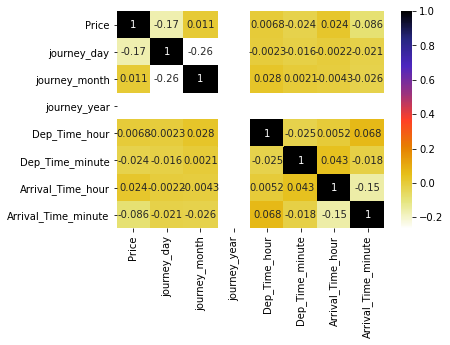

In [30]:
import seaborn as sb
sb.heatmap(train_data.corr(),annot=True, cmap = plt.cm.CMRmap_r)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   journey_day          10682 non-null  int64 
 8   journey_month        10682 non-null  int64 
 9   journey_year         10682 non-null  int64 
 10  Dep_Time_hour        10682 non-null  int64 
 11  Dep_Time_minute      10682 non-null  int64 
 12  Arrival_Time_hour    10682 non-null  int64 
 13  Arrival_Time_minute  10682 non-null  int64 
 14  Duration_hours       10682 non-null  object
 15  Duration_minutes     10682 non-null  object
dtypes: i

In [32]:
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_minutes'] = train_data['Duration_minutes'].astype(int)

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   journey_day          10682 non-null  int64 
 8   journey_month        10682 non-null  int64 
 9   journey_year         10682 non-null  int64 
 10  Dep_Time_hour        10682 non-null  int64 
 11  Dep_Time_minute      10682 non-null  int64 
 12  Arrival_Time_hour    10682 non-null  int64 
 13  Arrival_Time_minute  10682 non-null  int64 
 14  Duration_hours       10682 non-null  int64 
 15  Duration_minutes     10682 non-null  int64 
dtypes: i

### separating categorical data and continuous data

In [34]:
cat_data = [col for col in train_data.columns if train_data[col].dtype == 'O']        

In [35]:
cont_data = [col for col in train_data.columns if train_data[col].dtype != 'O'] 

In [36]:
cat_data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [37]:
cont_data

['Price',
 'journey_day',
 'journey_month',
 'journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

In [38]:
cat = train_data[cat_data]

In [39]:
cat.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [40]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [41]:
cat['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Plotting boxplots and other graphs to visualise

In [42]:
t1 = train_data.copy()

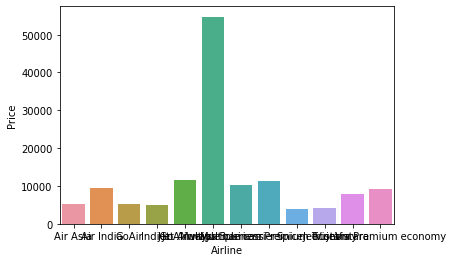

In [43]:
gg=t1.groupby('Airline')['Price'].agg('median').reset_index()
sb.barplot(x='Airline',y='Price', data=gg)
plt.rcParams['figure.figsize']=50,20  #graphsize
plt.show()

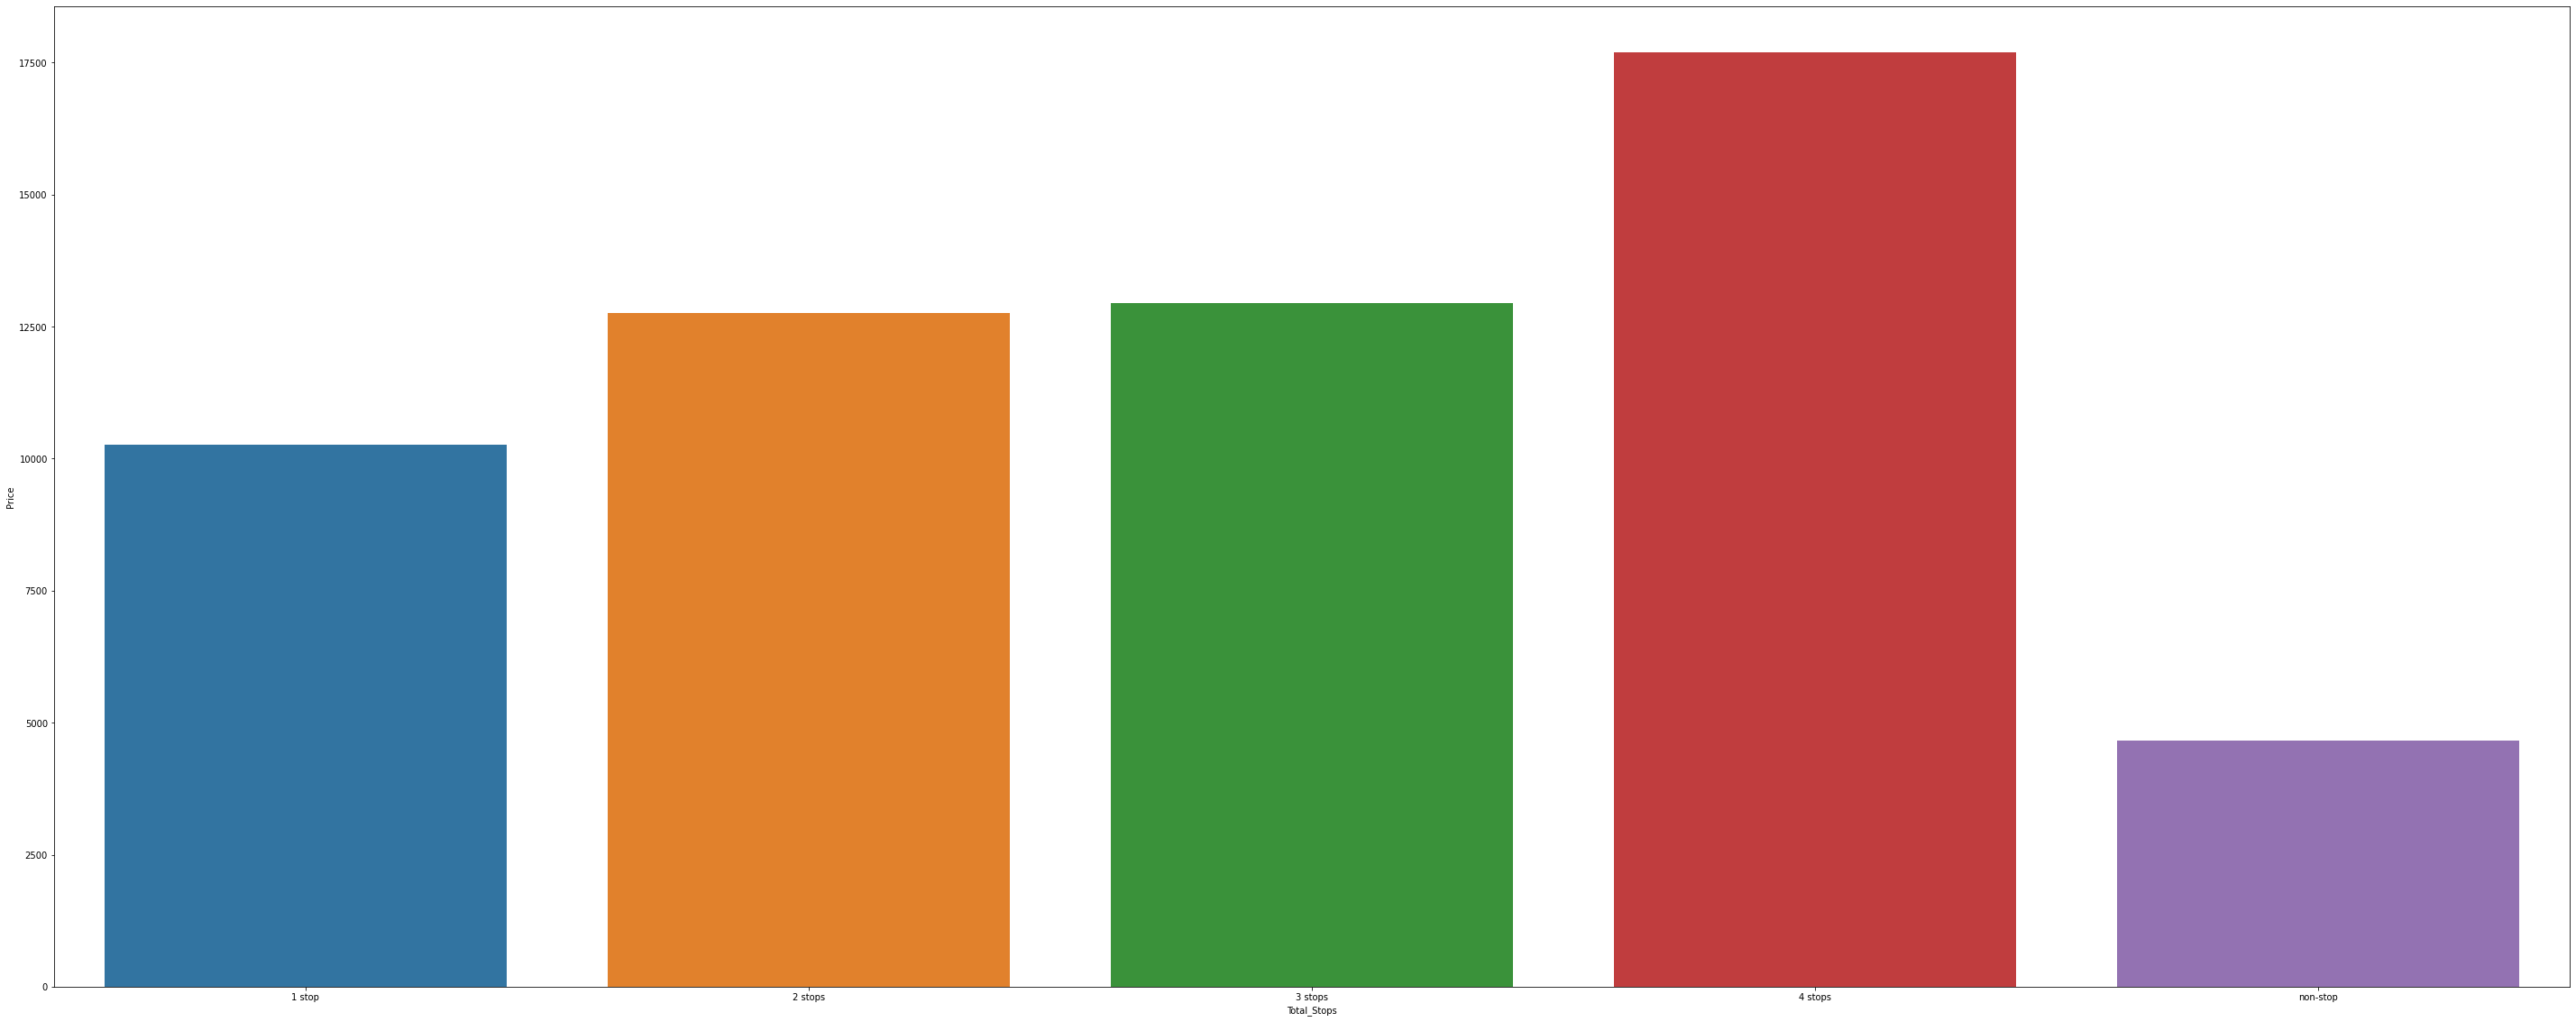

In [44]:
gg=t1.groupby('Total_Stops')['Price'].agg('median').reset_index()
sb.barplot(x='Total_Stops',y='Price', data=gg)
plt.rcParams['figure.figsize']=5,5  #graphsize
plt.show()

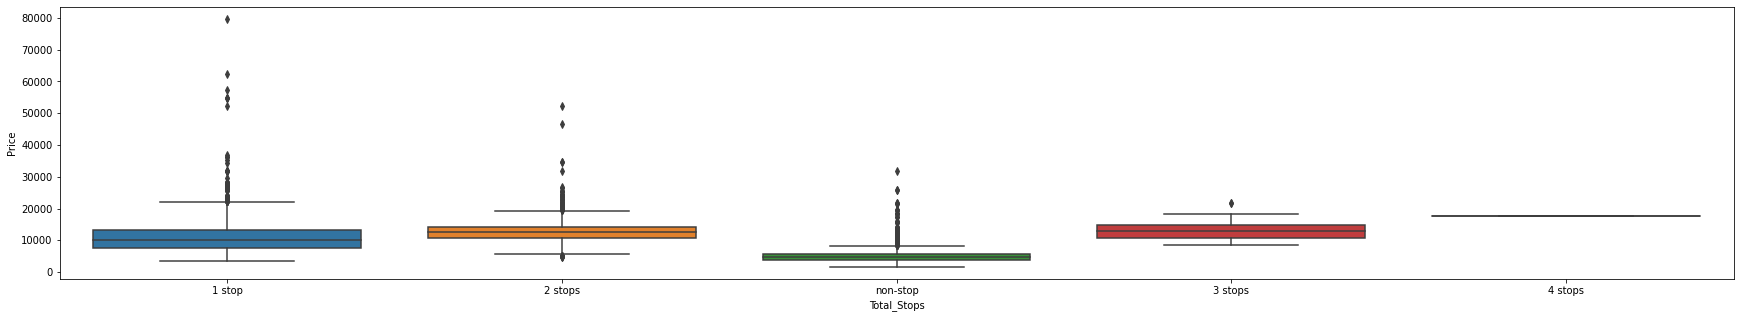

In [45]:
plt.figure(figsize = (30,5))
sb.boxplot(x = 'Total_Stops', y = 'Price', data = train_data.sort_values('Price', ascending=False))

In [46]:
airline = pd.get_dummies(cat['Airline'],drop_first = True)        #drop first = true to avoid creating an extra column by dummy variable

In [47]:
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


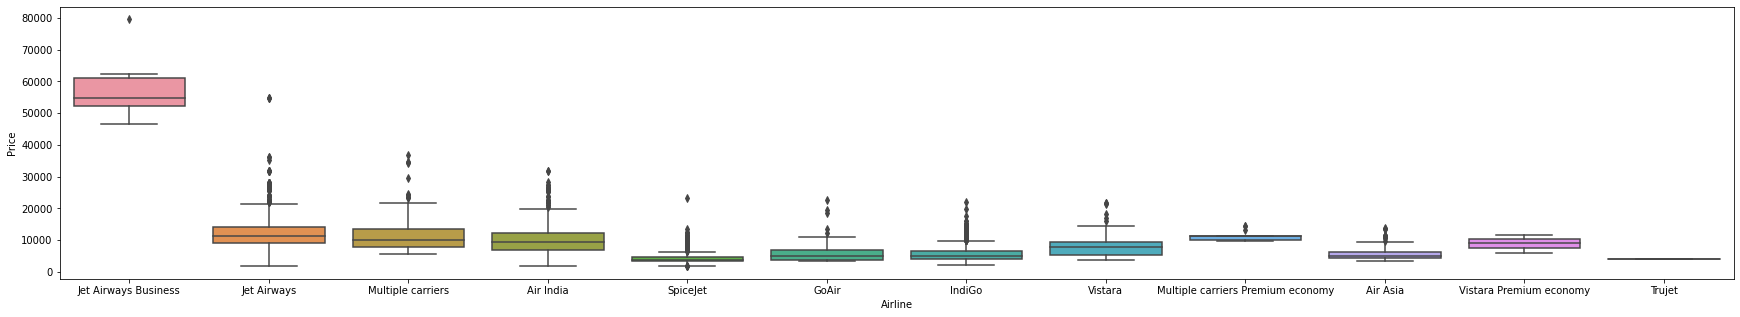

In [48]:
plt.figure(figsize = (30,5))
sb.boxplot(x = 'Airline', y = 'Price', data = train_data.sort_values('Price', ascending=False))

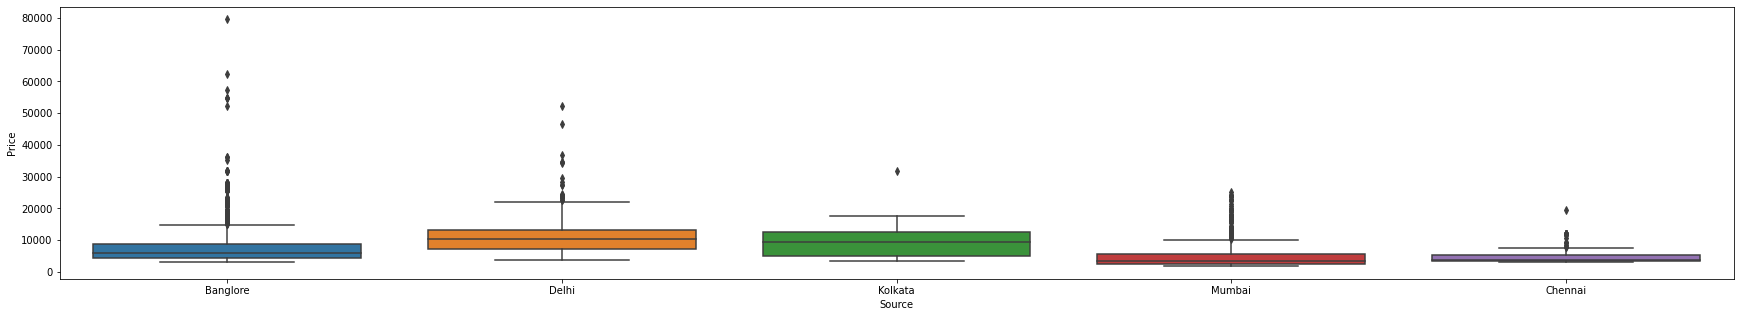

In [49]:
plt.figure(figsize = (30,5))
sb.boxplot(x = 'Source', y = 'Price', data = train_data.sort_values('Price', ascending=False))

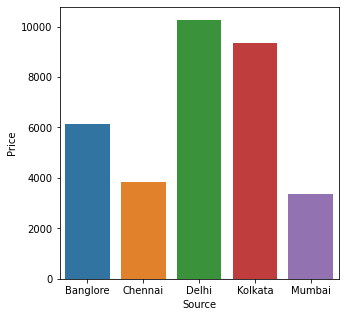

In [50]:
gg=t1.groupby('Source')['Price'].agg('median').reset_index()
sb.barplot(x='Source',y='Price', data=gg)
plt.rcParams['figure.figsize']=5,5  #graphsize
plt.show()

In [51]:
source = pd.get_dummies(cat['Source'],drop_first = True)        #drop first = true to avoid creating an extra column by dummy variable

In [52]:
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


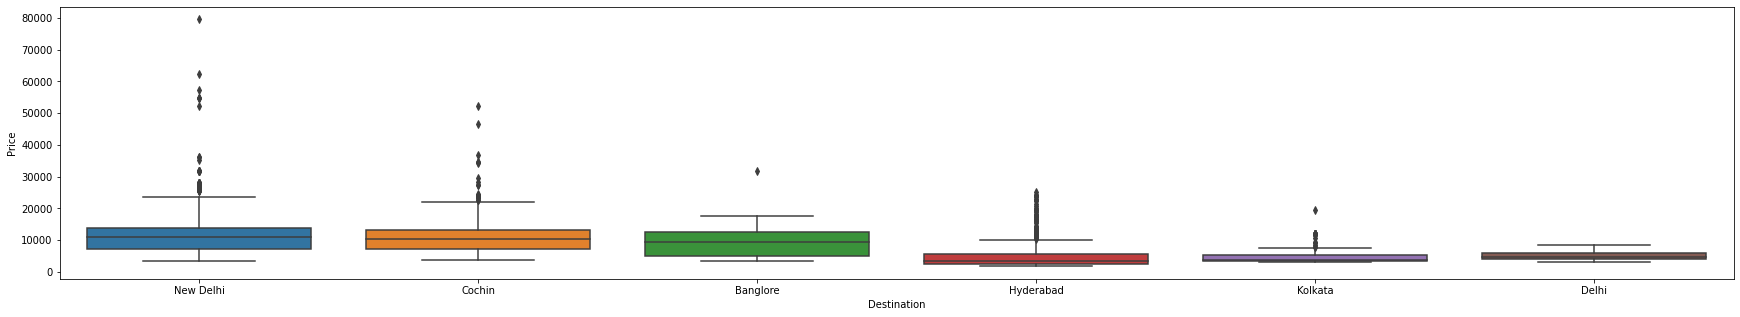

In [53]:
plt.figure(figsize = (30,5))
sb.boxplot(x = 'Destination', y = 'Price', data = train_data.sort_values('Price', ascending=False))

In [54]:
destination = pd.get_dummies(cat['Destination'],drop_first = True)        #drop first = true to avoid creating an extra column by dummy variable

In [55]:
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [56]:
def viz(col,col2):
  sb.boxplot(x = col, y = col2, data = t1.sort_values(col2, ascending=False))
  plt.show()
  a = pd.get_dummies(t1[col],drop_first = True)
  return a

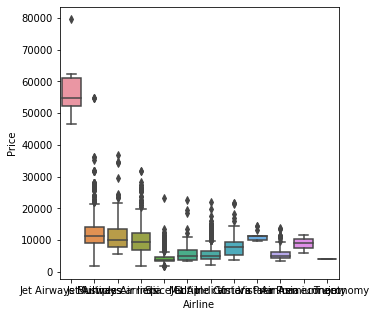

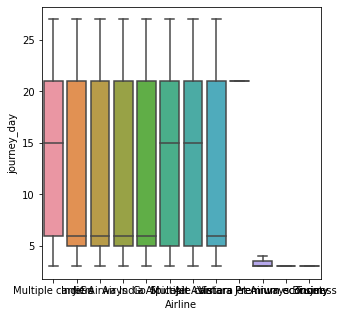

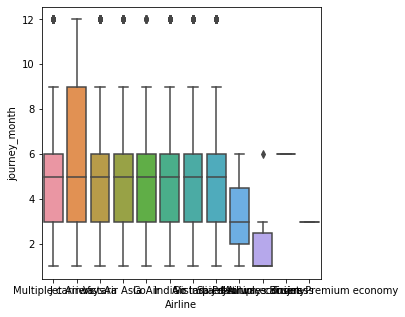

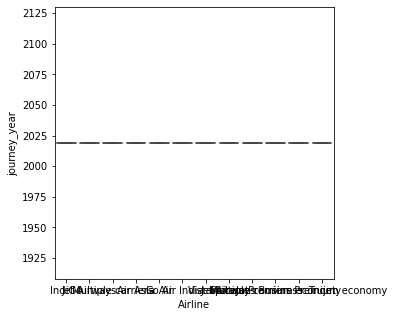

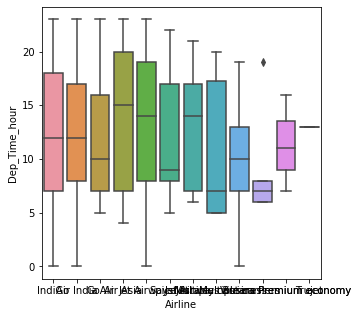

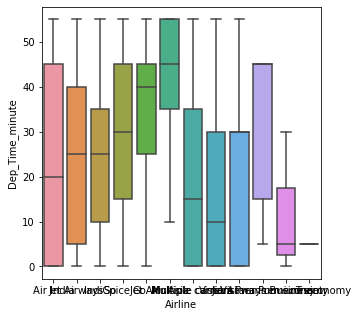

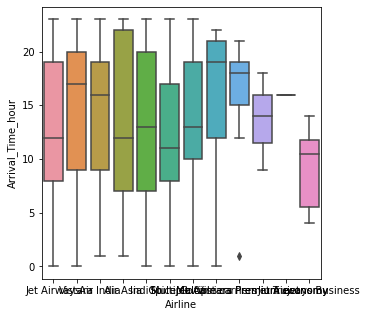

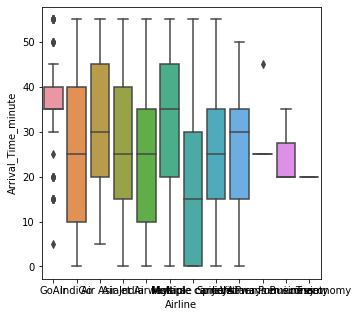

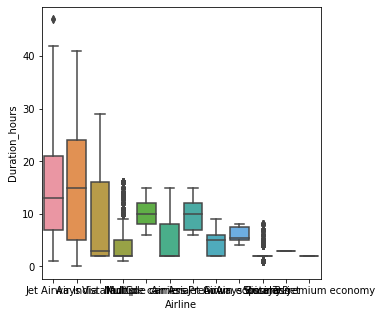

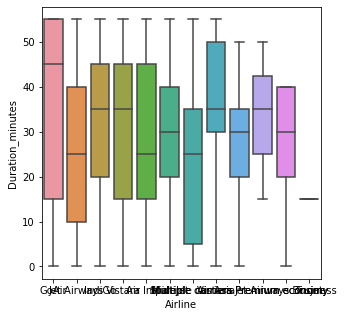

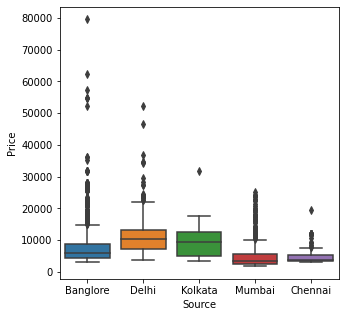

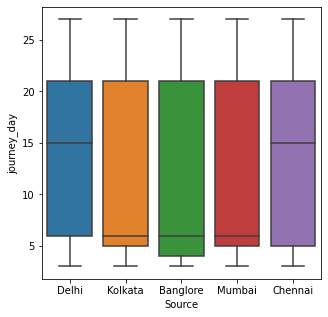

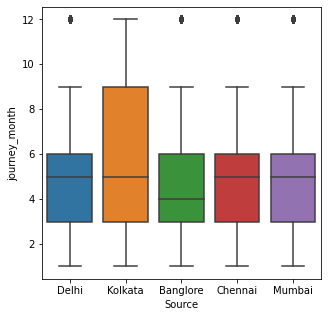

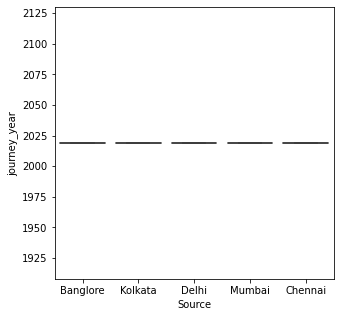

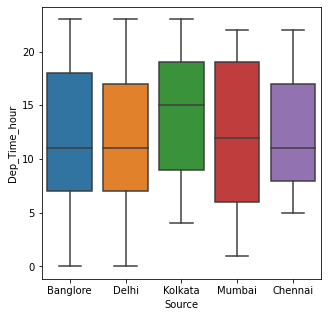

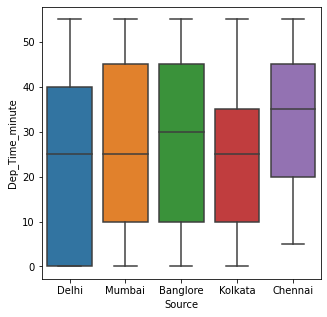

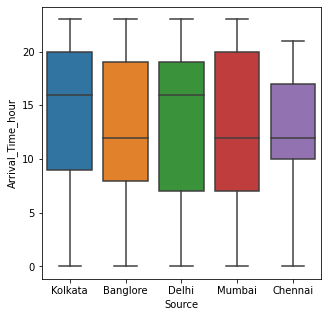

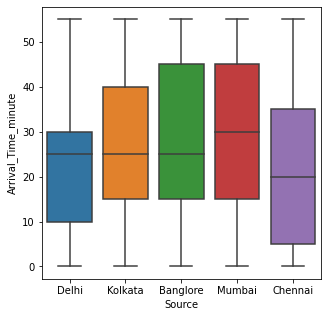

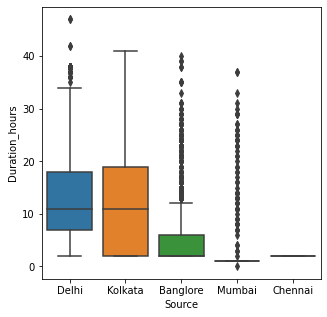

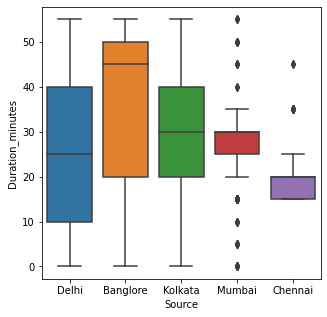

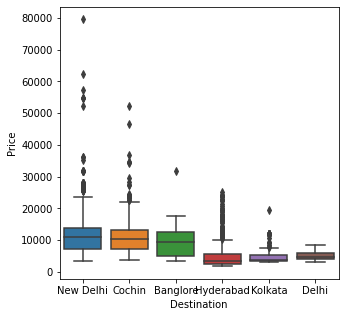

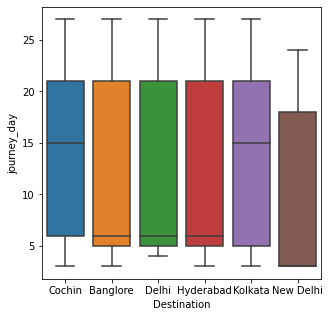

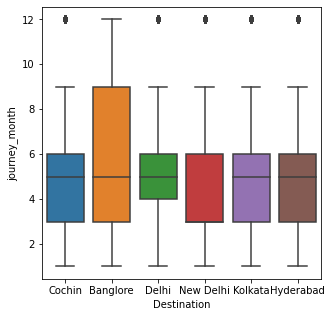

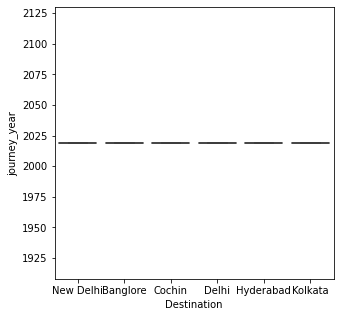

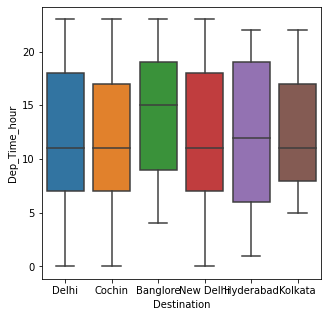

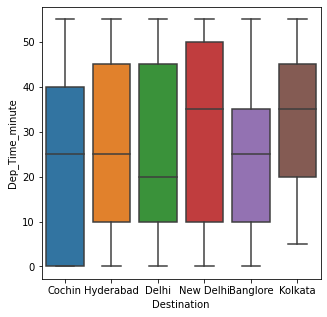

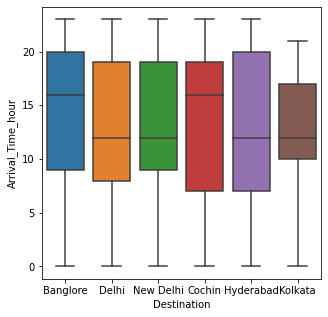

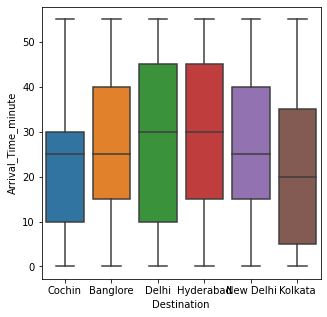

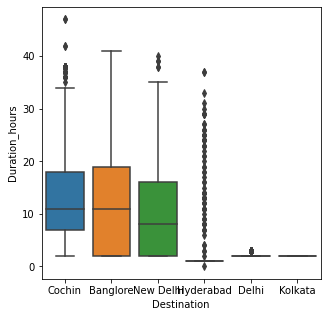

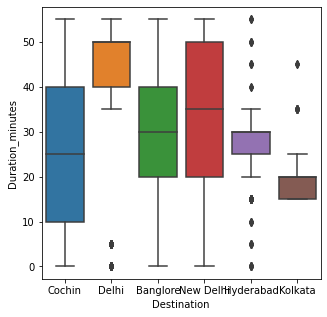

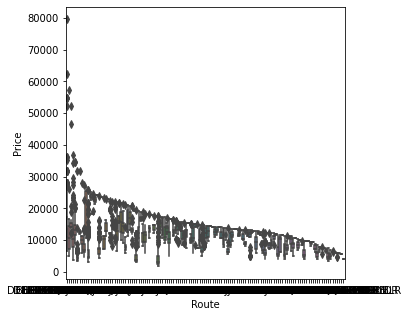

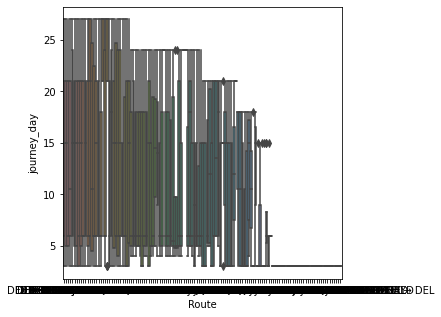

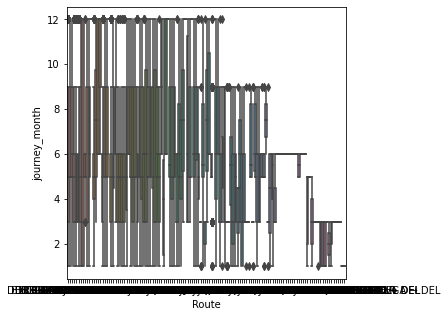

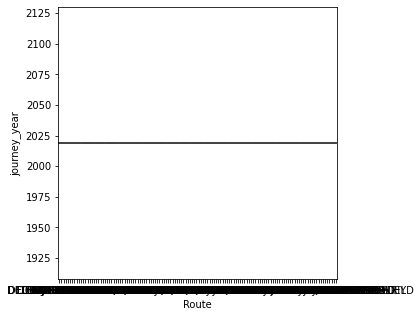

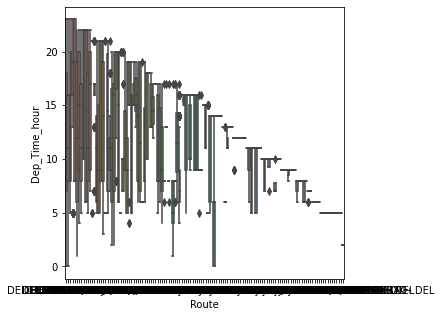

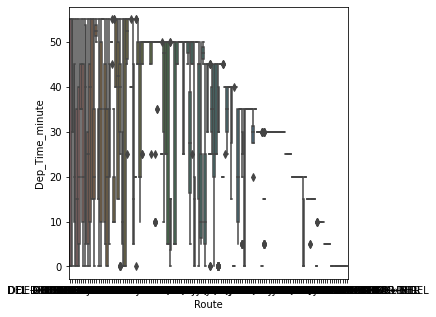

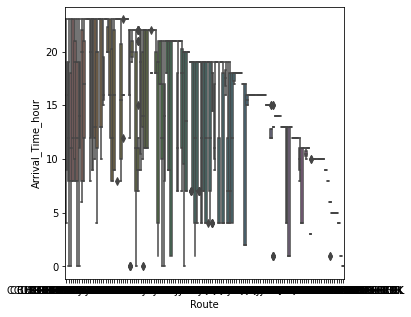

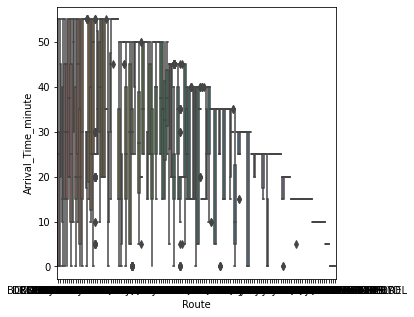

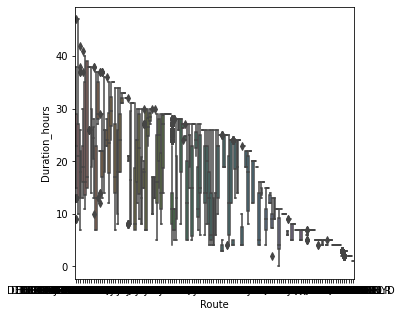

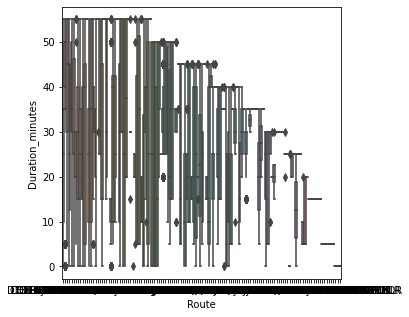

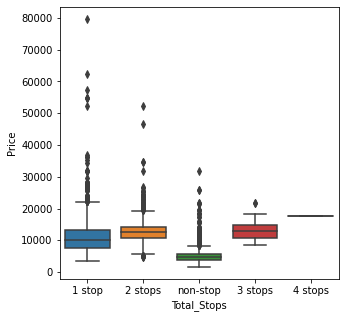

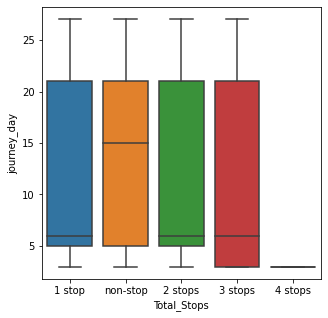

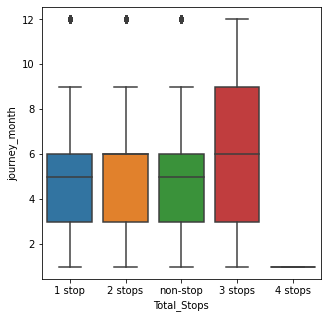

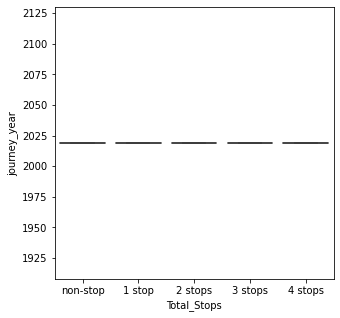

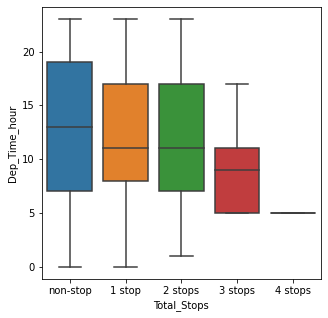

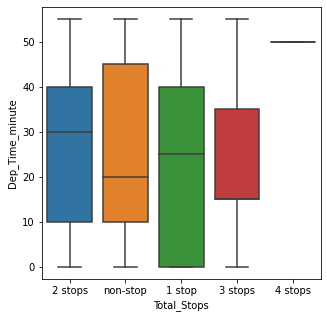

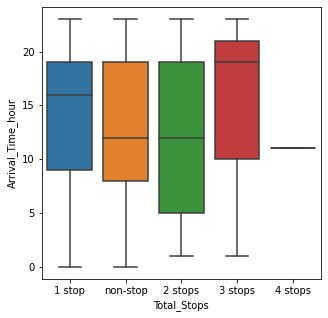

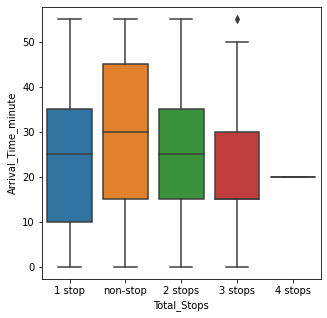

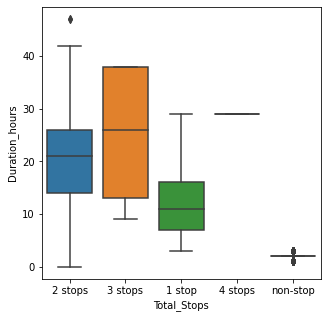

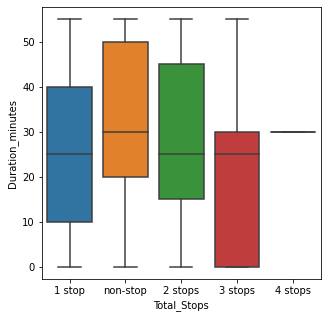

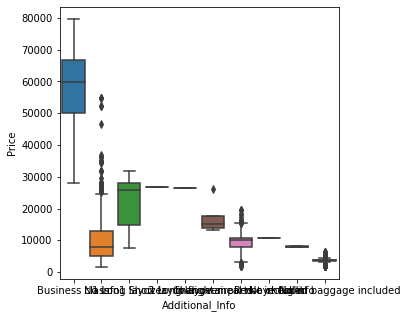

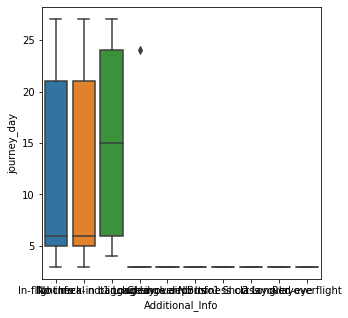

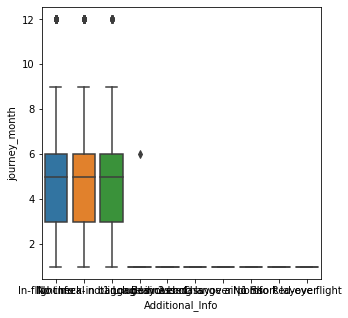

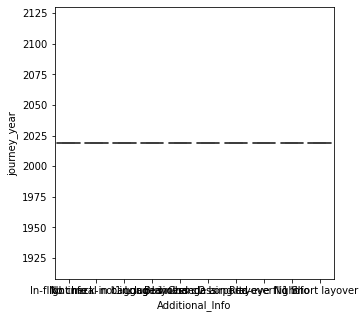

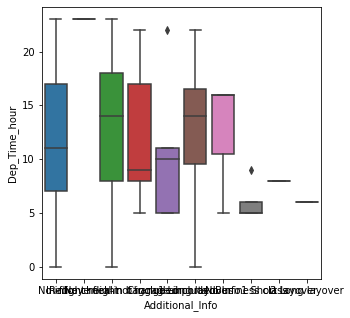

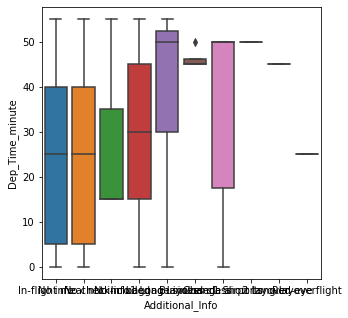

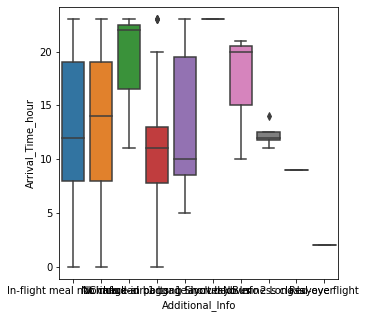

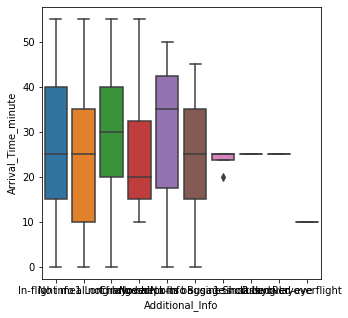

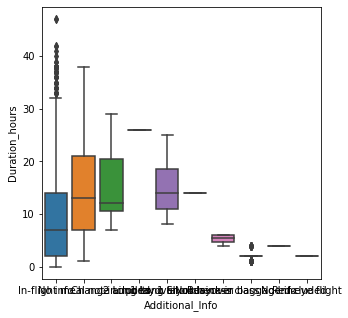

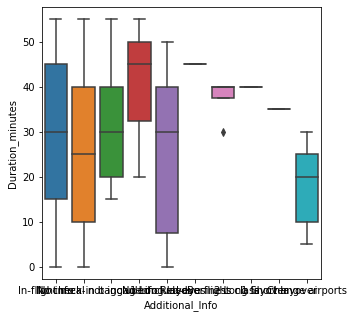

In [57]:
for i in cat_data:
  for j in cont_data:
    viz(i,j)

In [58]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   journey_day          10682 non-null  int64 
 8   journey_month        10682 non-null  int64 
 9   journey_year         10682 non-null  int64 
 10  Dep_Time_hour        10682 non-null  int64 
 11  Dep_Time_minute      10682 non-null  int64 
 12  Arrival_Time_hour    10682 non-null  int64 
 13  Arrival_Time_minute  10682 non-null  int64 
 14  Duration_hours       10682 non-null  int64 
 15  Duration_minutes     10682 non-null  int64 
dtypes: i

In [59]:
#abcd = ['Airline', 'Destination', 'Source']
#j = []
#for i in abcd:
 # j.append(viz(i))

In [60]:
#j[1]

### Splitting Route column and replacing null values

In [61]:
cat['route1'] = cat['Route'].str.split('→').str[0]
cat['route2'] = cat['Route'].str.split('→').str[1]
cat['route3'] = cat['Route'].str.split('→').str[2]
cat['route4'] = cat['Route'].str.split('→').str[3]
cat['route5'] = cat['Route'].str.split('→').str[4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [62]:
cat.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [63]:
drop_column(cat,'Route')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
cat.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
route1                 0
route2                 0
route3              3491
route4              9116
route5             10636
dtype: int64

In [65]:
cat.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'route1', 'route2', 'route3', 'route4', 'route5'],
      dtype='object')

In [66]:
#replacing null values with NaN
for i in ['route1', 'route2', 'route3', 'route4', 'route5']:
  cat[i].fillna('None',inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [67]:
#import numpy as np

#percentiles = [98, 76.37, 55.55, 69, 88]
#first_subject = np.array(percentiles)
#print(first_subject.dtype)

###Performing label encoding

In [68]:
# printing number of features with each and every category
for i in cat.columns:
  print('{} has total {} categories'.format(i,len(cat[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
route1 has total 5 categories
route2 has total 45 categories
route3 has total 30 categories
route4 has total 14 categories
route5 has total 6 categories


In [69]:
# since route 2 and 3 have lot of categories therefore we use label encoding to reduce high dimensionality
from sklearn.preprocessing import LabelEncoder
#intialising label encoder
encoder = LabelEncoder()

In [70]:
cat.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'route1', 'route2', 'route3', 'route4', 'route5'],
      dtype='object')

In [71]:
#encoding all routes
for i in ['route1', 'route2', 'route3', 'route4', 'route5']:
  cat[i] = encoder.fit_transform(cat[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
cat.head() #all routes encoded

,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [73]:
cat

,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,No info,0,13,29,13,5


In [74]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10682 non-null  object
 5   route1           10682 non-null  int64 
 6   route2           10682 non-null  int64 
 7   route3           10682 non-null  int64 
 8   route4           10682 non-null  int64 
 9   route5           10682 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 918.0+ KB


In [75]:
cat.isnull()

,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False


In [76]:
#since additional info has no info in it mostly therefore dropping the column
cat.drop('Additional_Info',axis=1)

,Airline,Source,Destination,Total_Stops,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,0,13,29,13,5


In [77]:
cat['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [78]:
# to convert to label encoder
dict = {'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}

In [79]:
cat['Total_Stops']=cat['Total_Stops'].map(dict) # mapped dict to total stops

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
cat.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,2,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,2,No info,0,34,8,13,5


In [81]:
#concatenating all variables
data_train = pd.concat([airline,source,destination,cat,train_data[cont_data]],axis=1)   #train_data[cat]

### Performed Label Encoding

In [82]:
data_train.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Airline,Source,Destination,Total_Stops,Additional_Info,route1,route2,route3,route4,route5,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5,3897,24,3,2019,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Air India,Kolkata,Banglore,1,No info,2,25,1,3,5,7662,5,1,2019,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,Jet Airways,Delhi,Cochin,1,No info,3,32,4,5,5,13882,6,9,2019,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,IndiGo,Kolkata,Banglore,2,No info,2,34,3,13,5,6218,5,12,2019,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,2,No info,0,34,8,13,5,13302,3,1,2019,16,50,21,35,4,45


In [83]:
data_train.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,route1,route2,route3,route4,route5,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5,3897,24,3,2019,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,25,1,3,5,7662,5,1,2019,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,32,4,5,5,13882,6,9,2019,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,34,3,13,5,6218,5,12,2019,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,34,8,13,5,13302,3,1,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,5,29,13,5,4107,4,9,2019,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,5,29,13,5,4145,27,4,2019,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,29,13,5,7229,27,4,2019,8,20,11,20,3,0
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5,12648,3,1,2019,11,30,14,10,2,40


### Handling Outliers

In [84]:
def plot(df,col):
  fig,(axis1,axis2) = plt.subplots(2,1)        #matrix of 2 rows 1 column axis1 = distribution axis2 = boxplot
  sb.distplot(df[col],ax=axis1)
  sb.boxplot(df[col],ax=axis2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


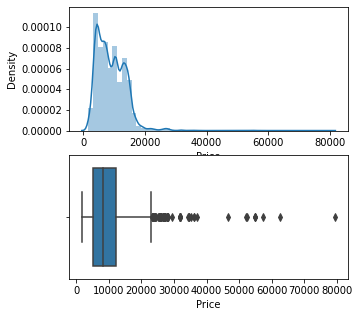

In [85]:
plot(data_train,'Price')
plt.rcParams['figure.figsize']=10,10

In [86]:
#outliers after 40000 therefore removing
data_train['Price'] = np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


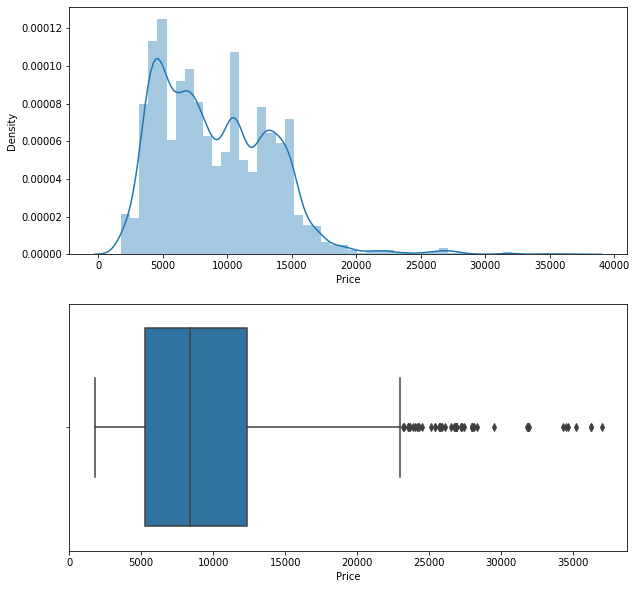

In [87]:
plot(data_train,'Price')
plt.rcParams['figure.figsize']=10,10

###Separating Independent and Dependent features

In [88]:
# y axis = dependent features   x axis = independent features
x = data_train.drop(['Airline', 'Source', 'Destination', 'Additional_Info','Price'],axis=1)    #dropping Price as it itself has to be predicted hence can't be independent
x.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,route1,route2,route3,route4,route5,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5,24,3,2019,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,25,1,3,5,5,1,2019,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,32,4,5,5,6,9,2019,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,34,3,13,5,5,12,2019,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,34,8,13,5,3,1,2019,16,50,21,35,4,45


In [89]:
y = data_train['Price']

In [90]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

###Feature Selection

In [91]:
#using mutual information selection
from sklearn.feature_selection import mutual_info_classif

In [92]:
mutual_info_classif(x,y)

array([7.33629937e-01, 1.07553618e-01, 6.64347375e-01, 9.33661470e-01,
       0.00000000e+00, 5.79556783e-01, 1.76435781e-02, 3.33115006e-01,
       1.28216372e-03, 2.02649778e-01, 0.00000000e+00, 1.51741044e-01,
       1.55263739e+00, 8.99558816e-01, 2.85438985e-01, 1.52916519e+00,
       4.01537731e-01, 2.93840305e-01, 1.61266692e-01, 3.77626609e-01,
       2.15337024e+00, 2.02296419e+00, 2.84052467e+00, 2.30749483e+00,
       1.47331568e+00, 7.80331399e-01, 1.08473343e+00, 8.97982637e-01,
       1.45066728e+00, 1.42920417e+00, 1.22715757e+00, 1.85044878e+00,
       1.52094744e+00, 1.77033952e+00, 1.07008292e+00])

In [93]:
mutual_info = mutual_info_classif(x,y)

In [94]:
#mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [95]:
imp = pd.DataFrame(mutual_info_classif(x,y),index = x.columns)     #importance dataframe where the importance is returned

In [96]:
imp   #telling contribution to the dataframe

,0
Air India,0.784930
GoAir,0.096501
IndiGo,0.664605
Jet Airways,0.930082
Jet Airways Business,0.000000
Multiple carriers,0.553692
Multiple carriers Premium economy,0.014156
SpiceJet,0.324974
Trujet,0.002398
Vistara,0.214084


In [97]:
imp.columns = ['Importance']      #renaming column name

In [98]:
#sorting column
imp.sort_values(by = 'Importance', ascending=False)       #jet airways has least relevance to the dataframe, hence can be skipped if desired

,Importance
route2,2.827327
route3,2.300818
Total_Stops,2.157119
route1,2.019521
Arrival_Time_hour,1.846512
Duration_hours,1.795169
Cochin,1.588153
Delhi,1.562014
Arrival_Time_minute,1.548239
journey_year,1.480588


##Implementing Machine Learning models

###Splitting data into training and testing

In [99]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)     #test size if 20% of total data

In [143]:
def predict(ml_model):                                                       #function to train the dataset as well as calculate RMS, MS, r^2 value, mean absolute error
  model = ml_model.fit(X_train, y_train)
  print("Training score : {}".format(model.score(X_train, y_train)))
  y_prediction = model.predict(X_test)
  print("Predictions are :\n {}".format(y_prediction))
  print("\n")

  #calculating metrics
  r2_score = metrics.r2_score(y_test, y_prediction)
  print("R squared value is : {}".format(r2_score))
  print("\nMean Absolute Error : ", metrics.mean_absolute_error(y_test, y_prediction))
  print("\nMean Squared Error : ", metrics.mean_squared_error(y_test, y_prediction))
  print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

  #plotting actual vs predicted values of flight fare
  sb.distplot(y_test-y_prediction)          #y_test = actual fares y_prediction = predicted values. this will calculate difference between the values and plot the difference.
                                            #if the distribution happens to be normal distribution then it is working vv good
  import seaborn as sns
  sns.scatterplot(y_test,y_prediction)
  plt.show()

###Random Forest

In [144]:
from sklearn.ensemble import RandomForestRegressor      #since regression is done

Training score : 0.9524290586859752
Predictions are :
 [16735.          6037.33        8877.34       ...  6683.54
 12907.158      13047.30433333]


R squared value is : 0.8306564417901078

Mean Absolute Error :  1152.4185721127649

Mean Squared Error :  3468117.3158758497

Root Mean Squared Error :  1862.2881935607736


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


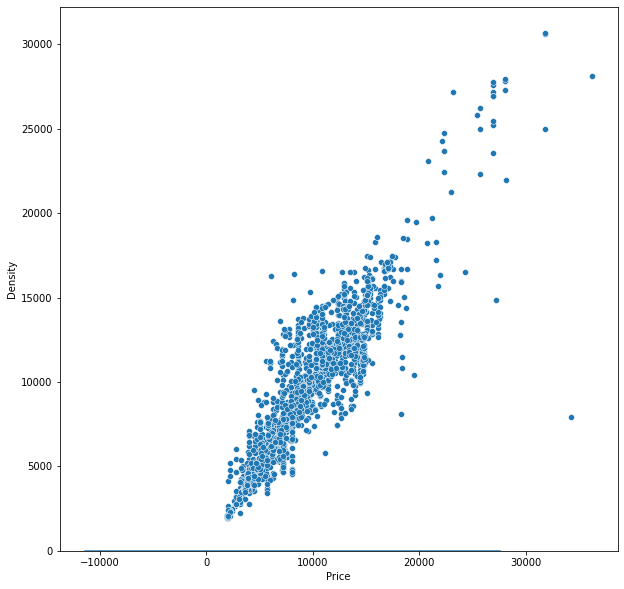

In [145]:
predict(RandomForestRegressor())

###Decision Trees

####Using predict function

In [140]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9656605025637307
Predictions are :
 [16840.  4959.  8610. ...  7006. 13339. 14335.]


R squared value is : 0.755375298314507

Mean Absolute Error :  1297.0417563562628

Mean Squared Error :  5009857.905282066

Root Mean Squared Error :  2238.27118671578


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


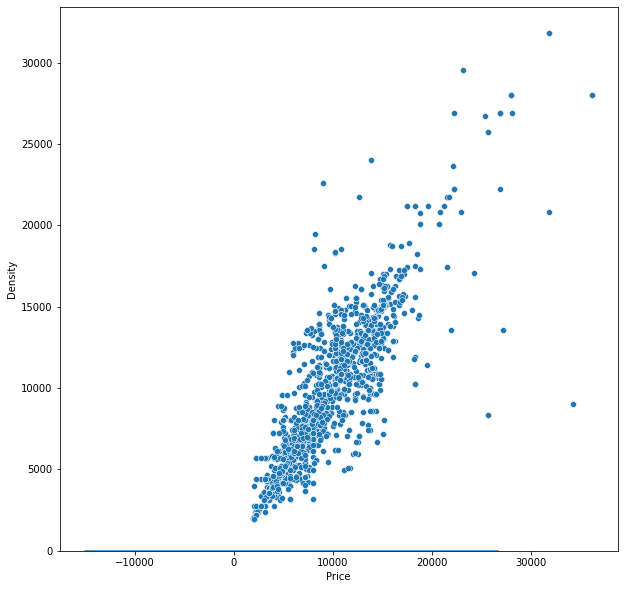

In [146]:
predict(DecisionTreeRegressor())

###Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression

Training score : 0.6136700546909868
Predictions are :
 [12474.62995864  8375.51024103  9541.72649768 ...  7145.70559164
 10842.61137136 11701.91344189]


R squared value is : 0.6094336217492035

Mean Absolute Error :  1957.9872374328627

Mean Squared Error :  7998710.040872281

Root Mean Squared Error :  2828.1990808414253


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


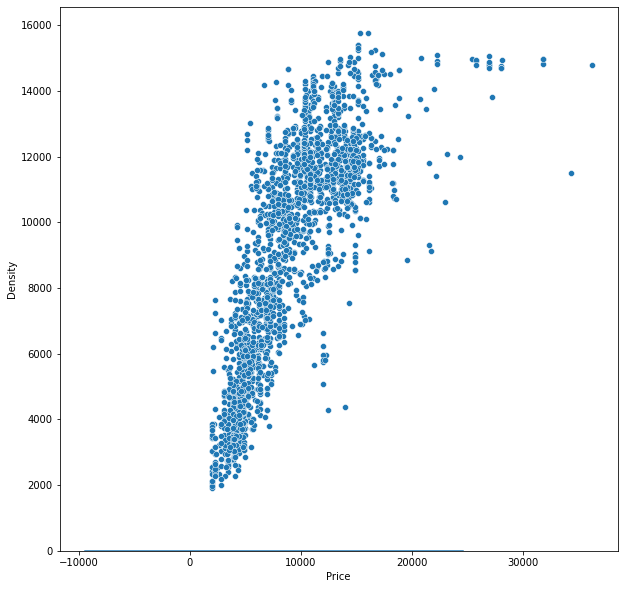

In [147]:
predict(LinearRegression())

##Cross Validation

###Randomizedsearch CV

In [148]:
from sklearn.model_selection import RandomizedSearchCV

In [149]:
#object of RF regressor
from sklearn.ensemble import RandomForestRegressor

In [150]:
reg_rf = RandomForestRegressor()

In [151]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]     #will return integer value which is evenly distrbuted over range 100 to 1200

In [152]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)] 

In [153]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : ['auto','sqrt'],
               'max_depth' : max_depth,
               'min_samples_leaf' : [5,10,15,100]            
              }   #n_estimators = number of trees  Max features is "Number of features allowed to make the best split while building the tree" or considered on a per-split level, rather than on the entire decision tree construction

In [154]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions =  random_grid, cv= 3, verbose = 2, n_jobs = -1)

In [155]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [156]:
rf_random.best_params_            #checking best parameters after fitting

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 1200}

In [157]:
prediction = rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


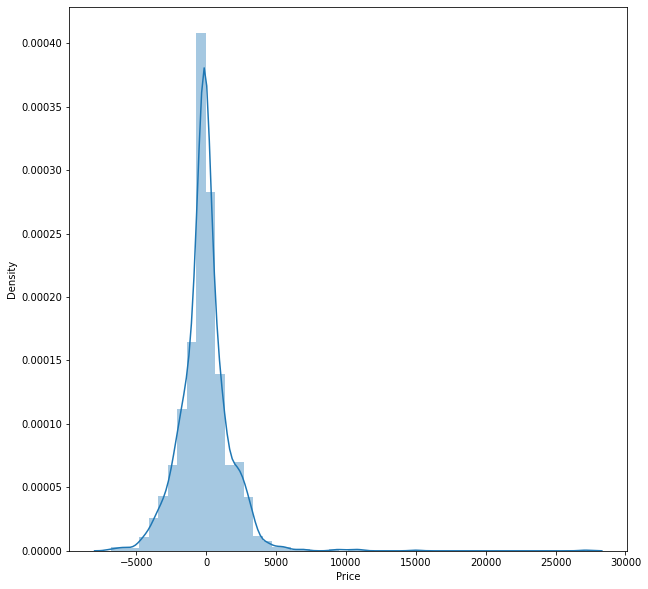

In [158]:
sb.distplot(y_test-prediction)

In [159]:
metrics.r2_score(y_test, prediction)      #accuracy improved from 0.8322 to 0.8386

0.8393688576516691